In [17]:
# integrantes: GABRIEL GOMEZ, EDUARDO DE LA HOZ, STEPHANIA DE LA HOZ, NEMESYS EVILLA

In [18]:
# image processing
from PIL import Image
from io import BytesIO
import webcolors

# data analysis
import math
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
from importlib import reload
from mpl_toolkits import mplot3d
import seaborn as sns

# modeling
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

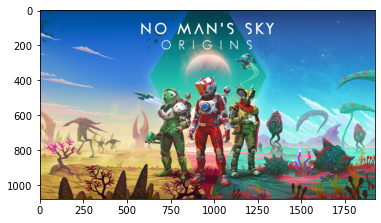

In [19]:
imagen = Image.open('no mans sky origins w.jpg')
#imagen = Image.open('no mans sky next w.jpg')
plt.imshow(np.array(imagen))
plt.show()

In [20]:
X = np.array(imagen.getdata())
pix = X.reshape(*imagen.size, -1)
pix.shape

(1920, 1080, 3)

In [21]:
#Dimension of the original image
rows = pix.shape[0]
cols = pix.shape[1]

#Flatten the image
#image = image.reshape(rows*cols, 3)

In [22]:
#Implement k-means clustering to form k clusters
kmeans = KMeans(n_clusters=8,n_jobs=-1,random_state=123)
kmeans.fit(X)

KMeans(n_jobs=-1, random_state=123)

In [23]:
#Replace each pixel value with its nearby centroid
#compressed_image = kmeans.cluster_centers_[kmeans.labels_]
compressed_image=[]
for label in kmeans.labels_:
    centroide=list(kmeans.cluster_centers_[label])
    compressed_image.append(centroide)
compressed_image=np.array(compressed_image).reshape(*imagen.size,-1)
#compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)
#Reshape the image to original dimension
#compressed_image = np.array(compressed_image).reshape(*imagen.size, -1)

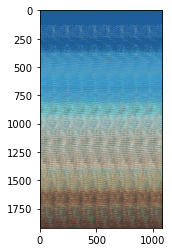

In [24]:
#Save and display output image
reload(plt)
plt.imshow(np.array(compressed_image/255).reshape(*compressed_image.shape))
plt.show()